## MNIST dataset-Clustering



In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import pandas as pd

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap = ListedColormap(["Red","Green","Blue"])
# cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


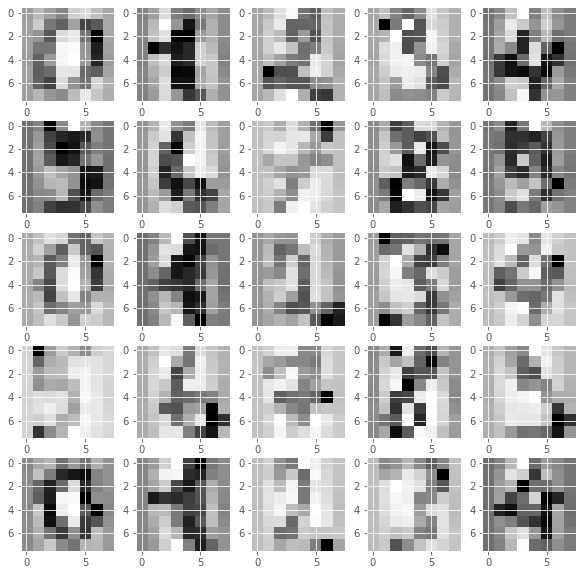

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### MNIST: k-means clustering
k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

In [13]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.6674645062374176

hierarchical clustering method to cluster the dataset.

In [14]:
# fit Agglomerative Clustering to data
ac_model = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=10)
ac_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y,labels_pred=ac_model.labels_)


0.7584914070326005

DBScan to cluster the dataset.use the DistanceMetric function to get a sense of typical distances between points.

In [7]:
import pandas as pd
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances 
df = pd.DataFrame(distances)
#df.describe()
print(ac_model.labels_[:10])

series = pd.Series(ac_model.labels_)
series[series==1]

df.insert(0, "labels", series)
df = df.sort_values("labels")

df = df.append(series, "rowl")
df.head(n=10)

[5 1 1 4 8 4 6 9 1 4]


,labels,0,1,2,3,4,5,6,7,8,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.0,10.389499,9.554871,11.868373,10.636914,12.242474,11.751034,9.903304,8.899783,10.682471,...,9.093940,12.524624,10.014023,10.132375,11.449353,10.978957,10.150847,10.158619,10.471155,11.458859
1,0.0,8.669225,9.083621,11.045104,8.751493,10.447801,10.138982,8.291893,10.964178,9.205087,...,8.099371,11.430756,10.052127,9.438376,10.489894,9.445010,8.887760,9.316979,8.821109,10.454788
2,0.0,12.332109,12.241900,12.975589,11.676605,13.996647,13.200494,11.811316,11.022962,12.117401,...,11.805776,14.869167,11.310356,11.693932,14.512233,12.571259,12.556948,12.071083,12.980667,11.764738
3,0.0,11.213056,11.484104,12.476066,10.849225,13.083284,12.663112,10.931865,10.823836,11.690578,...,10.629032,14.148729,11.206643,11.323289,13.715511,11.496959,11.574665,11.590375,11.870014,11.630030
4,0.0,6.880170,9.444559,10.811064,7.809656,10.113047,6.749805,9.073514,9.546424,8.226303,...,5.794793,10.767926,9.636941,9.006570,10.857094,6.164717,8.095466,9.289016,6.898542,9.050161
5,0.0,8.889359,10.674719,11.991325,7.755511,11.381696,8.550355,10.229739,10.752361,9.266290,...,7.376645,12.232945,11.183474,10.617901,12.323226,7.741655,9.526822,10.726634,8.555367,9.604380
6,0.0,7.750314,10.028222,11.517949,7.155196,10.962686,7.693370,9.746482,9.918896,8.386791,...,6.077754,11.651645,10.377401,9.927665,11.739718,6.793780,8.667610,10.229381,7.633026,9.190628
7,0.0,9.963927,11.067161,12.875427,7.588695,11.413553,9.880393,10.649005,12.711759,10.528473,...,8.367666,12.578303,12.681676,11.748204,12.519956,8.879638,11.207547,11.834182,9.367191,10.990654
8,0.0,9.213313,10.074656,11.722336,6.162926,10.857049,7.875480,9.302548,11.507826,8.858208,...,6.189497,11.992188,11.038768,9.926056,11.958561,6.810902,9.802423,9.782687,8.016211,9.169870
9,0.0,9.867594,10.027573,11.339931,10.008876,11.912212,10.528704,9.468623,10.290879,9.861707,...,9.521210,13.122093,9.304982,9.374295,12.602804,10.427342,10.328457,10.173465,10.461336,11.032665


In [10]:
df.describe()

,labels,0,1,2,3,4,5,6,7,8,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
count,1797.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,...,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,4.012243,9.427001,9.597247,10.341962,9.317812,10.481685,9.761231,9.366720,11.205336,9.246327,...,9.161976,11.200167,10.209493,9.204737,11.024144,9.095002,9.802173,9.330600,9.223270,10.101563
std,2.812608,3.026200,2.885893,2.711133,2.943438,2.783204,2.859152,2.930439,2.670371,2.809029,...,2.878939,2.926812,2.746428,2.845955,2.961734,3.008221,3.005937,2.842922,2.862318,2.726168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.376849,8.444601,9.147575,8.053994,9.287871,8.456566,8.032310,10.200347,8.068343,...,7.835242,9.786568,9.136289,7.980857,9.655268,7.528788,8.647711,8.122087,7.896158,8.822210
50%,4.000000,9.267799,9.471555,10.102948,9.087434,10.210234,9.447816,9.220917,11.111866,8.837031,...,8.837017,11.134807,9.998583,9.003762,10.919889,8.875514,9.649270,9.085565,8.918319,9.755847
75%,6.000000,10.304654,10.380019,11.030267,10.050444,11.209380,10.524158,10.263771,11.886001,9.886998,...,9.861573,12.239211,10.846753,9.904450,12.187020,10.014144,10.723785,9.988309,9.854181,10.767926
max,9.000000,48.238333,48.917352,48.383393,48.996929,48.145768,49.016219,48.563717,49.503611,48.818798,...,48.779013,47.919713,48.952603,48.931808,48.199944,48.782511,48.277673,48.703832,48.816560,48.174417


In [29]:
dbscan_model = DBSCAN(eps=4.2, min_samples=2)

dbscan_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y,labels_pred=dbscan_model.labels_)

0.6586707476852938

finding the clustering method with the largest homogeneity score for this dataset. 

In [9]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="random", data=X)

__________________________________________________
   method                   time      homo
                   random   0.17s     0.681 


In [30]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="random", data=X)

 
method = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=10)
compare_method(estimator=method,name="best hierarchical meth", data=X) 

method = SpectralClustering(n_clusters=10,affinity='nearest_neighbors')
compare_method(estimator=method,name="spectral clustering", data=X) 




__________________________________________________
   method                   time      homo
                k-means++   0.30s     0.601 
                   random   0.25s     0.660 
   best hierarchical meth   0.20s     0.758 
      spectral clustering   0.67s     0.805 
